<a href="https://colab.research.google.com/github/anubhavanand1516/Artenal/blob/main/nba_2013(Anubhav_anand)(Artenal).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
with open("nba_2013.csv", 'r') as csv:
    dataset = pd.read_csv(csv)

In [ ]:
!cat 'nba_2013.csv'

player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,4,15,0.266666666666667,62,126,0.492063492063492,0.482,35,53,0.66,72,144,216,28,23,26,30,122,171,2013-2014,2013
Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,0,0,NA,93,185,0.502702702702703,0.503,79,136,0.581,142,190,332,43,40,57,71,203,265,2013-2014,2013
Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.52,0,0,NA,143,275,0.52,0.52,76,119,0.639,102,204,306,38,24,36,39,108,362,2013-2014,2013
Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,128,300,0.426666666666667,336,711,0.472573839662447,0.522,274,336,0.815,32,230,262,248,35,3,146,136,1330,2013-2014,2013
Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,0,1,0,136,248,0.548387096774194,0.546,56,67,0.836,94,183,277,40,23,46,63,187,328,2013-2014,2013
Cole Aldrich,C,25,NYK,46,2,330,33,61,0.541,0,0,NA,33,61,0.540983606557377,0.541,26,30,0.867,37,92,129,14,8,30,18,40

In [ ]:
dataset

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,4,15,0.266667,62,126,0.492063,0.482,35,53,0.660,72,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,0,0,NaN,93,185,0.502703,0.503,79,136,0.581,142,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,0,0,NaN,143,275,0.520000,0.520,76,119,0.639,102,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,128,300,0.426667,336,711,0.472574,0.522,274,336,0.815,32,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,0,1,0.000000,136,248,0.548387,0.546,56,67,0.836,94,183,277,40,23,46,63,187,328,2013-2014,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,Tony Wroten,SG,20,PHI,72,16,1765,345,808,0.427,40,188,0.212766,305,620,0.491935,0.452,209,326,0.641,69,159,228,217,78,16,204,151,939,2013-2014,2013
477,Nick Young,SG,28,LAL,64,9,1810,387,889,0.435,135,350,0.385714,252,539,0.467532,0.511,235,285,0.825,29,137,166,95,46,12,95,156,1144,2013-2014,2013
478,Thaddeus Young,PF,25,PHI,79,78,2718,582,1283,0.454,90,292,0.308219,492,991,0.496468,0.489,163,229,0.712,166,310,476,182,167,36,165,213,1417,2013-2014,2013
479,Cody Zeller,C,21,CHA,82,3,1416,172,404,0.426,0,1,0.000000,172,403,0.426799,0.426,146,200,0.730,118,235,353,92,40,41,87,170,490,2013-2014,2013


In [ ]:
dataset.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,4,15,0.266667,62,126,0.492063,0.482,35,53,0.660,72,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,0,0,NaN,93,185,0.502703,0.503,79,136,0.581,142,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,0,0,NaN,143,275,0.520000,0.520,76,119,0.639,102,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,128,300,0.426667,336,711,0.472574,0.522,274,336,0.815,32,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,0,1,0.000000,136,248,0.548387,0.546,56,67,0.836,94,183,277,40,23,46,63,187,328,2013-2014,2013


In [ ]:
dataset.shape

(481, 31)

In [ ]:
dataset.mean()

age             26.509356
g               53.253638
gs              25.571726
mp            1237.386694
fg             192.881497
fga            424.463617
fg.              0.436436
x3p             39.613306
x3pa           110.130977
x3p.             0.285111
x2p            153.268191
x2pa           314.332640
x2p.             0.466947
efg.             0.480752
ft              91.205821
fta            120.642412
ft.              0.722419
orb             55.810811
drb            162.817048
trb            218.627859
ast            112.536383
stl             39.280665
blk             24.103950
tov             71.862786
pf             105.869023
pts            516.582121
season_end    2013.000000
dtype: float64

In [ ]:
dataset.describe()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,479.000000,481.000000,481.000000,414.000000,481.000000,481.000000,478.000000,479.000000,481.000000,481.000000,461.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.0
mean,26.509356,53.253638,25.571726,1237.386694,192.881497,424.463617,0.436436,39.613306,110.130977,0.285111,153.268191,314.332640,0.466947,0.480752,91.205821,120.642412,0.722419,55.810811,162.817048,218.627859,112.536383,39.280665,24.103950,71.862786,105.869023,516.582121,2013.0
std,4.198265,25.322711,29.658465,897.258840,171.832793,368.850833,0.098672,50.855639,132.751732,0.157633,147.223161,294.174554,0.104448,0.099552,103.667725,131.240639,0.160166,62.101191,145.348116,200.356507,131.019557,34.783590,30.875381,62.701690,71.213627,470.422228,0.0
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.0
25%,23.000000,32.000000,0.000000,388.000000,47.000000,110.000000,0.400500,0.000000,3.000000,0.234355,31.000000,67.000000,0.434719,0.451000,16.000000,22.000000,0.654000,12.000000,43.000000,55.000000,20.000000,9.000000,4.000000,21.000000,44.000000,115.000000,2013.0
50%,26.000000,61.000000,10.000000,1141.000000,146.000000,332.000000,0.438000,16.000000,48.000000,0.330976,110.000000,227.000000,0.474475,0.488000,53.000000,73.000000,0.751000,35.000000,135.000000,168.000000,65.000000,32.000000,14.000000,58.000000,104.000000,401.000000,2013.0
75%,29.000000,76.000000,54.000000,2016.000000,307.000000,672.000000,0.479500,68.000000,193.000000,0.375000,230.000000,459.000000,0.513729,0.526000,126.000000,179.000000,0.821000,73.000000,230.000000,310.000000,152.000000,60.000000,32.000000,108.000000,158.000000,821.000000,2013.0
max,39.000000,83.000000,82.000000,3122.000000,849.000000,1688.000000,1.000000,261.000000,615.000000,1.000000,706.000000,1408.000000,1.000000,1.000000,703.000000,805.000000,1.000000,440.000000,783.000000,1114.000000,721.000000,191.000000,219.000000,295.000000,273.000000,2593.000000,2013.0


In [ ]:
dataset.columns

Index(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'season', 'season_end'],
      dtype='object')

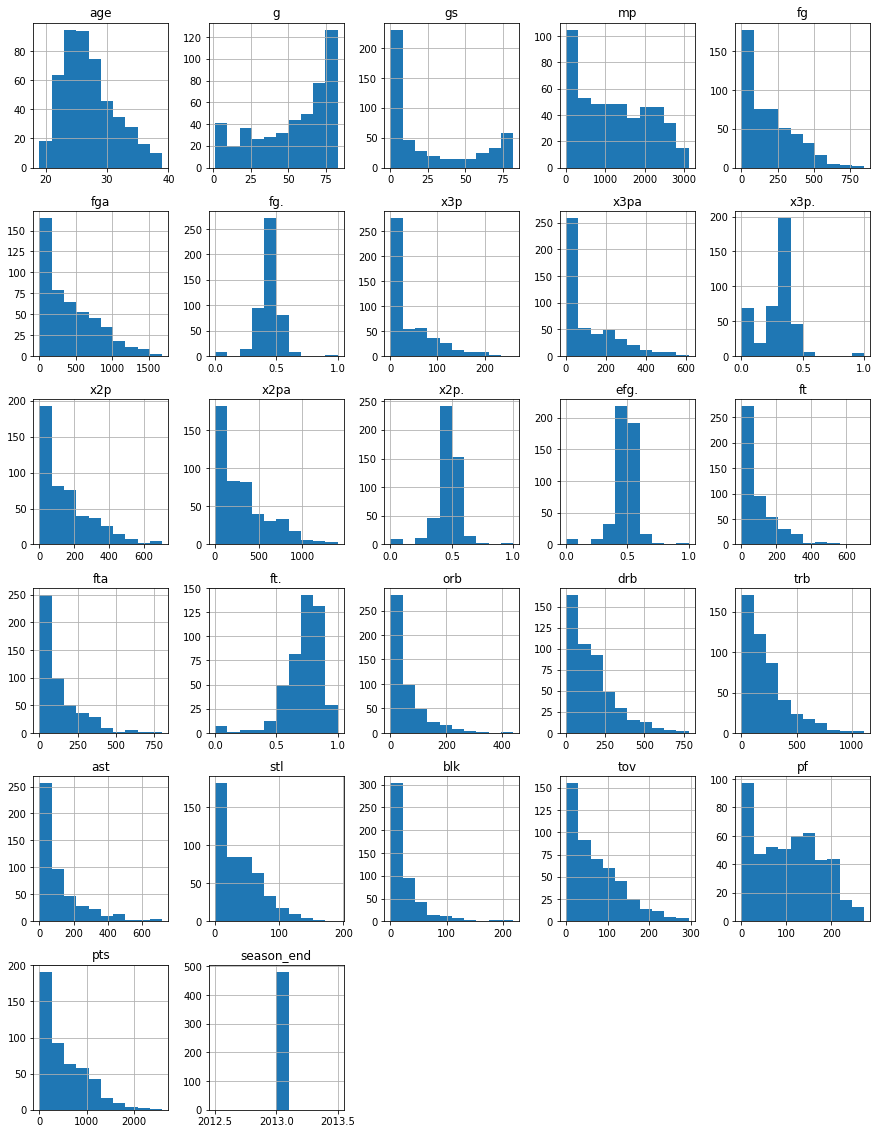

In [ ]:
dataset.hist(figsize=(15,20))
plt.show()


In [ ]:
data =nba.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player        481 non-null    object 
 1   pos           481 non-null    object 
 2   age           481 non-null    int64  
 3   bref_team_id  481 non-null    object 
 4   g             481 non-null    int64  
 5   gs            481 non-null    int64  
 6   mp            481 non-null    int64  
 7   fg            481 non-null    int64  
 8   fga           481 non-null    int64  
 9   fg.           479 non-null    float64
 10  x3p           481 non-null    int64  
 11  x3pa          481 non-null    int64  
 12  x3p.          414 non-null    float64
 13  x2p           481 non-null    int64  
 14  x2pa          481 non-null    int64  
 15  x2p.          478 non-null    float64
 16  efg.          479 non-null    float64
 17  ft            481 non-null    int64  
 18  fta           481 non-null    

In [ ]:
data.drop('player', inplace=True, axis=1)
data.drop('bref_team_id', inplace=True, axis=1)
data.drop('season', inplace=True, axis=1)
data.drop('season_end', inplace=True, axis=1)

In [ ]:
 data.isnull().sum()

pos      0
age      0
g        0
gs       0
mp       0
fg       0
fga      0
fg.      2
x3p      0
x3pa     0
x3p.    67
x2p      0
x2pa     0
x2p.     3
efg.     2
ft       0
fta      0
ft.     20
orb      0
drb      0
trb      0
ast      0
stl      0
blk      0
tov      0
pf       0
pts      0
dtype: int64

In [ ]:
data.dropna(subset=['fg.'], inplace=True)
data.dropna(subset=['x2p.'], inplace=True)
data.dropna(subset=['efg.'], inplace=True)

In [ ]:
data.isnull().sum()

pos      0
age      0
g        0
gs       0
mp       0
fg       0
fga      0
fg.      0
x3p      0
x3pa     0
x3p.    65
x2p      0
x2pa     0
x2p.     0
efg.     0
ft       0
fta      0
ft.     18
orb      0
drb      0
trb      0
ast      0
stl      0
blk      0
tov      0
pf       0
pts      0
dtype: int64

In [ ]:
data.drop('x3p.', axis=1, inplace=True)
data.drop('ft.', axis=1, inplace=True)

In [ ]:
data['pos'].unique()

array(['SF', 'C', 'PF', 'SG', 'PG', 'G', 'F'], dtype=object)

In [ ]:
data.columns

Index(['pos', 'age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa', 'x2p',
       'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'orb', 'drb', 'trb', 'ast', 'stl',
       'blk', 'tov', 'pf', 'pts'],
      dtype='object')

In [ ]:
X=data[data.columns[:-1]]
Y=data[data.columns[-1]]

In [ ]:
X.shape, Y.shape

((478, 24), (478,))

In [ ]:
for k in X.columns:
    if X[k].dtypes == 'object':
        X= pd.get_dummies(X, columns=[k])

In [ ]:

set(X.columns)-set(df.columns)

{'pos_C', 'pos_F', 'pos_G', 'pos_PF', 'pos_PG', 'pos_SF', 'pos_SG'}

In [ ]:
X.columns

Index(['age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa', 'x2p',
       'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'orb', 'drb', 'trb', 'ast', 'stl',
       'blk', 'tov', 'pf', 'pos_C', 'pos_F', 'pos_G', 'pos_PF', 'pos_PG',
       'pos_SF', 'pos_SG'],
      dtype='object')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((382, 30), (96, 30), (382,), (96,))

In [ ]:
X_train.head()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x2p,x2pa,x2p.,efg.,ft,fta,orb,drb,trb,ast,stl,blk,tov,pf,pos_C,pos_F,pos_G,pos_PF,pos_PG,pos_SF,pos_SG
208,23,34,34,1143,203,454,0.447,30,77,173,377,0.458886,0.480,51,63,28,114,142,268,56,12,105,92,0,0,0,0,1,0,0
265,30,69,67,2288,513,981,0.523,0,1,513,980,0.523469,0.523,231,296,182,461,643,147,48,26,152,206,0,0,0,1,0,0,0
200,23,70,23,1856,344,639,0.538,0,1,344,638,0.539185,0.538,91,177,171,326,497,113,41,116,114,185,0,0,0,1,0,0,0
278,27,79,79,2862,457,1080,0.423,190,500,267,580,0.460345,0.511,313,385,88,281,369,586,121,15,194,267,0,0,0,0,1,0,0
379,24,65,13,1089,143,300,0.477,0,0,143,300,0.476667,0.477,64,94,82,172,254,51,24,47,44,134,1,0,0,0,0,0,0


In [ ]:
sd = StandardScaler()
X_train = sd.fit_transform(X_train)
X_test = sd.fit_transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
classifier = KNeighborsRegressor(n_neighbors=5, metric= "minkowski", p =2)
classifier.fit(X_train, y_train)

KNeighborsRegressor()

[ 267.4  321.2    2.8  365.6  427.4  155.   901.2  208.4 1008.8   52.4
  940.6  118.2  759.8  837.4  995.   102.8  100.8 1278.    96.6   62.4
   64.    29.6  108.6  981.4  199.8  333.8  128.   680.4   79.   344.4
  417.4  452.8  176.8    3.2  337.    58.2   62.2  108.8  406.4  727.2
  689.   403.8  100.2   97.8 1262.2  317.2 1048.6  203.   505.2  904.2
  981.4 1479.4  544.8   72.6   10.6  297.8  312.6   38.   562.2 1202.8
   81.6 1199.6  719.    71.6   57.4 1148.2   92.4  116.2 1331.   431.4
  547.   456.   732.6 1346.2  340.4 1409.   330.   470.   418.4  449.4
  713.8  988.4  427.6 1177.   233.6 1323.6  520.6  932.8  333.8  731.
  756.6  553.   600.   100.8  325.6   85. ]
15     436
126    202
190      0
157    248
380    403
      ... 
315    636
418    622
109      3
172    338
359     74
Name: pts, Length: 96, dtype: int64


Text(0.5, 1.0, 'actual Pts vs Predicted Pts')

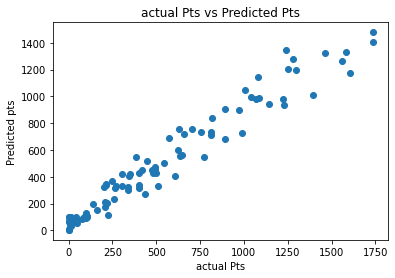

In [ ]:
y_pred = classifier.predict(X_test)
plt.scatter(y_test, y_pred)
print(y_pred)
print(y_test)
plt.xlabel("actual Pts")
plt.ylabel("Predicted pts")
plt.title("actual Pts vs Predicted Pts")

In [ ]:
import math
print(mean_squared_error(y_test, y_pred))

print(math.sqrt(mean_squared_error(y_test, y_pred)))

15356.644166666667
123.9219277071926


In [ ]:
rmse = []
for K in range(20):
    K_value = K+1
    neigh = KNeighborsRegressor(n_neighbors = K_value, metric= "minkowski", p =2)
    neigh.fit(X_train, y_train) 
    y_pred = neigh.predict(X_test)
    print(y_pred)
    rmse.append(math.sqrt(mean_squared_error(y_test, y_pred)))
    print('RMSE value for k= ' , K , 'is:', math.sqrt(mean_squared_error(y_test, y_pred)))

[3.020e+02 4.570e+02 6.000e+00 2.610e+02 4.250e+02 1.890e+02 1.096e+03
 1.440e+02 1.068e+03 2.800e+01 8.240e+02 9.300e+01 6.660e+02 9.150e+02
 8.590e+02 1.200e+01 8.900e+01 1.298e+03 6.200e+01 9.900e+01 1.500e+01
 4.700e+01 5.400e+01 1.107e+03 1.100e+02 3.150e+02 7.500e+01 7.670e+02
 6.600e+01 3.280e+02 4.570e+02 5.250e+02 2.740e+02 0.000e+00 2.610e+02
 2.500e+01 1.500e+01 1.150e+02 4.900e+02 9.440e+02 5.920e+02 4.030e+02
 4.800e+01 9.800e+01 1.304e+03 3.500e+02 1.068e+03 3.020e+02 4.800e+02
 9.110e+02 1.107e+03 2.112e+03 7.720e+02 6.600e+01 1.000e+00 2.400e+02
 3.500e+02 6.000e+00 5.140e+02 1.096e+03 7.100e+01 1.614e+03 6.030e+02
 6.600e+01 1.100e+01 9.880e+02 1.100e+02 1.780e+02 1.478e+03 4.030e+02
 5.030e+02 4.800e+02 8.900e+02 1.417e+03 5.380e+02 1.248e+03 3.500e+02
 4.970e+02 4.870e+02 5.790e+02 9.440e+02 9.390e+02 2.800e+02 1.257e+03
 2.020e+02 1.478e+03 4.610e+02 9.210e+02 3.390e+02 6.960e+02 8.380e+02
 5.030e+02 7.590e+02 8.200e+01 3.290e+02 9.900e+01]
RMSE value for k=  0 is: 

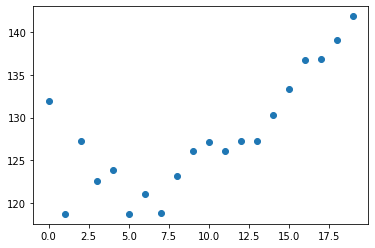

In [ ]:
plt.scatter(range(20), rmse)

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = KNeighborsRegressor(metric= "minkowski", p =2)

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 3}